# STEP 1 
### define your goal

#### try to determine factors that lead to churn of telcoCo customers in order to attempt to mitigate those factors. 
#### The target for this information is stakeholders that could enact change that could lead to a reduction in churn 
#### I think that the monthly charges that customers are being charged could lead to more churn and that monthly charges could potentially be linked to tenure. perhaps those that have a higher tenure were got a deal on their phone/internet that gave them better monthly rates. 
#### the minimum viable product would be being able to present to the stakeholders potential links to what is causing churn. 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [33]:
telcom = pd.read_csv("spreadsheet.csv")
telco=telcom
telcom.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [3]:
telcom.T

,0,1,2,3,4,5,6,7,8,9,...,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
is_senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
phone_service,1,2,1,1,1,1,1,2,1,2,...,1,1,1,1,1,1,2,1,1,0
internet_service,1,1,2,2,2,1,2,2,1,1,...,0,2,2,2,0,1,2,1,1,1
contract_type,1,0,0,0,0,0,2,2,0,2,...,0,1,1,0,0,1,0,0,2,2
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check,Credit card (automatic),Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,...,Mailed check,Bank transfer (automatic),Mailed check,Mailed check,Bank transfer (automatic),Mailed check,Electronic check,Mailed check,Mailed check,Electronic check
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,...,18.9,84.95,94.05,70.15,20.95,55.15,85.1,50.3,67.85,59.0


In [4]:
telcom['rounded_tenure']= telcom['tenure'].round(decimals = 0).astype(int)

In [5]:
telcom['has_phone'] = np.where(telcom.phone_service == 0 , False, True)

In [6]:
telcom['has_internet'] = np.where(telcom.internet_service == 0 , False , True)

In [7]:
telcom['internet_phone'] =(telcom['has_phone'])& (telcom['has_internet'])

In [8]:
telcom['female_dependents'] = (telcom.gender == 'Female') & (telcom.dependents == 'Yes')

In [9]:
telcom['male_dependents'] = (telcom.gender == 'Male') & (telcom.dependents == 'Yes')

In [22]:
telcom.T

,0,1,2,3,4,5,6,7,8,9,...,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
is_senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
phone_service,1,2,1,1,1,1,1,2,1,2,...,1,1,1,1,1,1,2,1,1,0
internet_service,1,1,2,2,2,1,2,2,1,1,...,0,2,2,2,0,1,2,1,1,1
contract_type,1,0,0,0,0,0,2,2,0,2,...,0,1,1,0,0,1,0,0,2,2
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check,Credit card (automatic),Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,...,Mailed check,Bank transfer (automatic),Mailed check,Mailed check,Bank transfer (automatic),Mailed check,Electronic check,Mailed check,Mailed check,Electronic check
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,...,18.9,84.95,94.05,70.15,20.95,55.15,85.1,50.3,67.85,59.0


# STEP 2: KNOW YOUR DATA
### We have a range of info about customers from telcoCo, including those that have churned and haven't churned
### the monthly charges range from 18.25 - 118.75, but includes those that only have one line vs multiple lines and includes both types of services. 
### the dataset includes males and females along with elderly and depenedents
### 11 null values in total charges. if needed, will fill column the cells with averages using         column_means = df. mean()       df = df. fillna(column_means)   
### realized labled dataframe as telcom instead of telco. set telco equal to telcom. will switch to telco and use telco in remainder. 


In [27]:
telcom.isna().sum()

customer_id           0
gender                0
is_senior_citizen     0
partner               0
dependents            0
phone_service         0
internet_service      0
contract_type         0
payment_type          0
monthly_charges       0
total_charges        11
churn                 0
tenure                0
rounded_tenure        0
has_phone             0
has_internet          0
internet_phone        0
female_dependents     0
male_dependents       0
dtype: int64

In [23]:
telcom.monthly_charges.min()

18.25

In [24]:
telcom.monthly_charges.max()

118.75

In [10]:
telcom.female_dependents.value_counts()

False    6018
True     1031
Name: female_dependents, dtype: int64

In [11]:
telcom.male_dependents.value_counts()

False    5965
True     1084
Name: male_dependents, dtype: int64

# STEP 3 answer initial hypothesis
### checking variables against churn to see if there are any significant outliers. 

# Gender and Churn

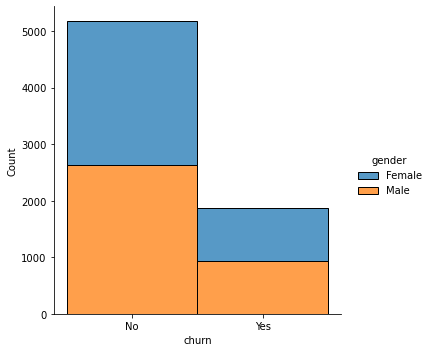

In [12]:
sns.displot(x='churn', data = telcom, hue= 'gender', multiple ='stack')

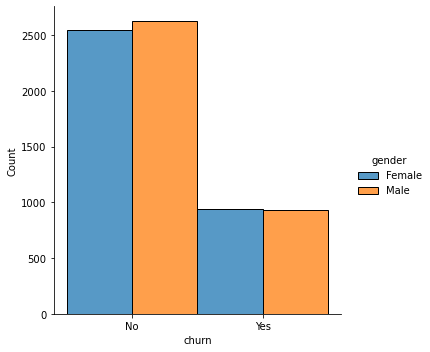

In [13]:
sns.displot(x='churn', data = telcom, hue= 'gender', multiple ='dodge')

# has dependents

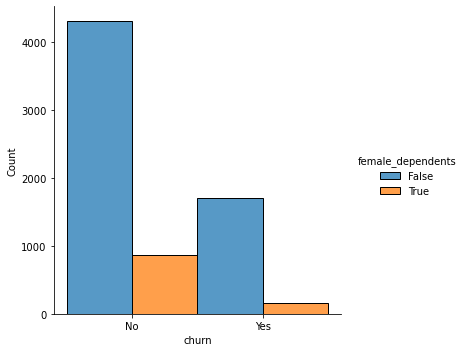

In [14]:
sns.displot(x='churn', data = telcom, hue = 'female_dependents', multiple = 'dodge')


#### females with dependants have a very low churn rate. this could be indicative of multiple lines 

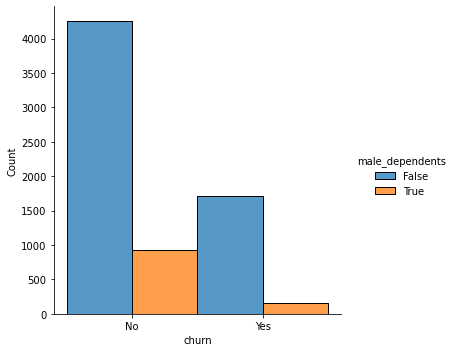

In [15]:
sns.displot(x='churn', data = telcom, hue = 'male_dependents', multiple = 'dodge')

#### males with dependants also have a low churn rate. 

# has phone and or internet

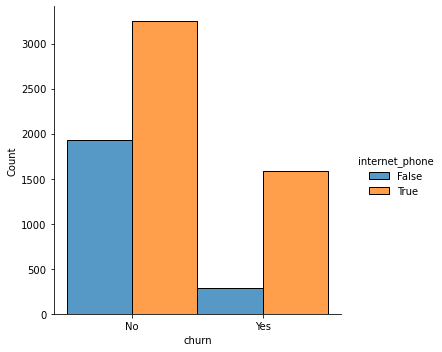

In [16]:
sns.displot(x='churn', data = telcom, hue = 'internet_phone', multiple = 'dodge')

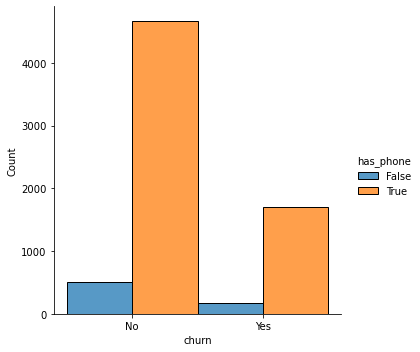

In [17]:
sns.displot(x='churn', data = telcom, hue = 'has_phone', multiple = 'dodge')

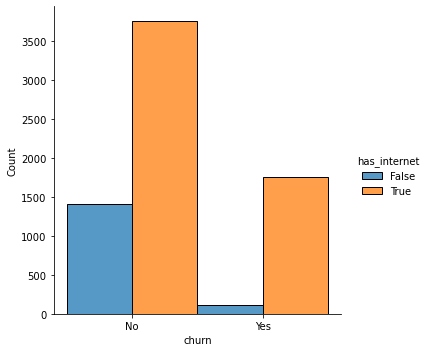

In [18]:
sns.displot(x='churn', data = telcom, hue = 'has_internet', multiple = 'dodge')

# Monthly Charges and churn 



<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

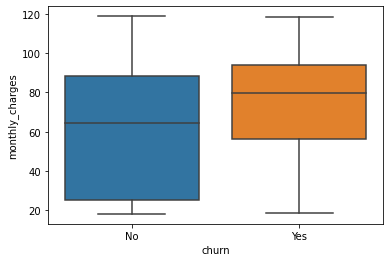

In [19]:
sns.boxplot(x= 'churn' , y = 'monthly_charges' , data = telcom)

#### those that churned have a higher average monthly charge than those that didn't churn 

# Tenure and Churn

<AxesSubplot:xlabel='churn', ylabel='tenure'>

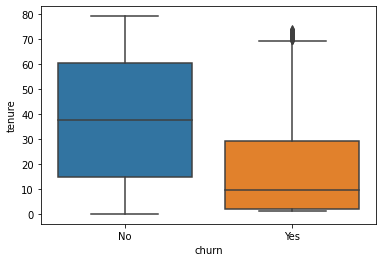

In [35]:
sns.boxplot(x= 'churn' , y = 'tenure' , data = telcom)

#### those that have a higher tenure seem to be less likely to churn

# Contract type and Churn

<AxesSubplot:xlabel='contract_type', ylabel='monthly_charges'>

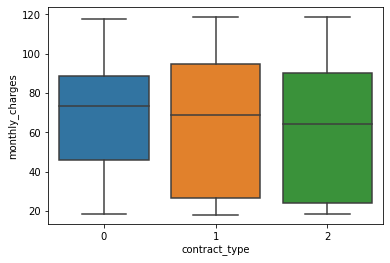

In [21]:
sns.boxplot(x= 'contract_type' , y = 'monthly_charges', data = telcom)

#### average monthly charges don't seem to be influenced too much by contract type